In [1]:
%matplotlib inline
import numpy as np
import torch
from d2l import torch as d2l
import zipfile
import os
import pandas as pd
from torch import nn
# import os  
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
print(torch.cuda.is_available())

True


In [3]:
print(torch.cuda.device_count())

1


In [4]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [5]:
# def unzip(dir,filename):
#     fname=os.path.join(dir,filename)
#     fp=zipfile.ZipFile(fname,'r')
#     fp.extractall(dir)

# unzip('./data','california-house-prices.zip')

In [6]:
train_data=pd.read_csv('./data/train.csv')
test_data=pd.read_csv("./data/test.csv")

In [7]:
train_data.head(5)

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,...,"Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",4047.0,...,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,...,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,NaN,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,...,"Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,2016-08-30,1500000.0,Culver City,90230,CA
4,4,7415 O Donovan Rd,1175000.0,Beautiful 200 acre ranch land with several pas...,VacantLand,NaN,NaN,NaN,0 spaces,NaN,...,NaN,NaN,NaN,2019-06-07,1595000.0,2016-06-27,900000.0,Creston,93432,CA


In [8]:
test_data.head(1)

,Id,Address,Summary,Type,Year built,Heating,Cooling,Parking,Lot,Bedrooms,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,47439,3034 N Coolidge Ave,Live within steps to the scenic views on the L...,SingleFamily,2020.0,Central,Central Air,Tandem Uncovered,940.0,2,...,Tandem Uncovered,NaN,NaN,2020-11-06,799900.0,2020-07-01,819000.0,Dodgertown,90090,CA


In [9]:
print(train_data.shape)
print(test_data.shape)

(47439, 41)
(31626, 40)


In [10]:
y_train=train_data.iloc[:,2]
train_data.drop(train_data.columns[2],axis=1,inplace=True)

In [11]:
y_train.head(1),train_data.head(1)

(0    3825000.0
 Name: Sold Price, dtype: float64,
    Id      Address                                            Summary  \
 0   0  540 Pine Ln  540 Pine Ln, Los Altos, CA 94022 is a single f...   
 
            Type  Year built                                       Heating  \
 0  SingleFamily      1969.0  Heating - 2+ Zones, Central Forced Air - Gas   
 
                                            Cooling  \
 0  Multi-Zone, Central AC, Whole House / Attic Fan   
 
                               Parking  Lot  \
 0  Garage, Garage - Attached, Covered  1.0   
 
                                             Bedrooms  ...  \
 0  Ground Floor Bedroom, Master Bedroom on Ground...  ...   
 
                      Parking features  Tax assessed value  Annual tax amount  \
 0  Garage, Garage - Attached, Covered            886486.0            12580.0   
 
     Listed On  Listed Price Last Sold On Last Sold Price       City    Zip  \
 0  2019-10-24     4198000.0          NaN             NaN  Los A

In [12]:
train_data.shape

(47439, 40)

In [13]:
train_data.head(1)

,Id,Address,Summary,Type,Year built,Heating,Cooling,Parking,Lot,Bedrooms,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,"Ground Floor Bedroom, Master Bedroom on Ground...",...,"Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA


In [14]:
train_data.columns==test_data.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [15]:

all_features=pd.concat((train_data.iloc[:,1:],test_data.iloc[:,1:]))


In [16]:
print(all_features.shape)

(79065, 39)


In [17]:
all_features.head(1)

,Address,Summary,Type,Year built,Heating,Cooling,Parking,Lot,Bedrooms,Bathrooms,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,540 Pine Ln,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,"Ground Floor Bedroom, Master Bedroom on Ground...",0.0,...,"Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA


In [18]:
numeric_features=all_features.dtypes[all_features.dtypes!='object'].index

In [19]:
print(numeric_features)

Index(['Year built', 'Lot', 'Bathrooms', 'Full bathrooms',
       'Total interior livable area', 'Total spaces', 'Garage spaces',
       'Elementary School Score', 'Elementary School Distance',
       'Middle School Score', 'Middle School Distance', 'High School Score',
       'High School Distance', 'Tax assessed value', 'Annual tax amount',
       'Listed Price', 'Last Sold Price', 'Zip'],
      dtype='object')


In [20]:
print(len(numeric_features))

18


In [21]:
all_features[numeric_features].head(5)

,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
0,1969.0,1.0,0.0,NaN,1.0,0.0,0.0,7.0,0.4,NaN,NaN,8.0,1.3,886486.0,12580.0,4198000.0,NaN,94022
1,1926.0,4047.0,2.0,2.0,872.0,1.0,1.0,3.0,0.8,2.0,1.1,2.0,1.3,505000.0,6253.0,525000.0,328000.0,90047
2,1958.0,9147.0,3.0,1.0,1152.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10.1,49627.0,468.0,180000.0,NaN,95375
3,1947.0,NaN,3.0,3.0,2612.0,0.0,0.0,9.0,0.2,7.0,0.2,8.0,0.2,1775000.0,20787.0,1895000.0,1500000.0,90230
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.5,5.0,10.2,6.0,10.6,NaN,NaN,1595000.0,900000.0,93432


In [22]:
all_features[numeric_features]=all_features[numeric_features].apply(
    lambda x:(x-x.mean())/x.std()
)
all_features[numeric_features]=all_features[numeric_features].fillna(0)
all_features=all_features[numeric_features]

In [23]:
# all_features=pd.get_dummies(all_features,dummy_na=True,dtype=int)
# all_features.shape

In [24]:
n_train=train_data.shape[0]
train_features=torch.tensor(all_features[:n_train].values,dtype=torch.float32)
test_features=torch.tensor(all_features[n_train:].values,dtype=torch.float32)

train_labels=torch.tensor(y_train.values.reshape(-1,1),dtype=torch.float32)

train_features=train_features.to(device)
test_features=test_features.to(device)
train_labels=train_labels.to(device)

In [25]:
loss=nn.MSELoss()
in_features=train_features.shape[1]
def get_net():
    net=nn.Sequential(nn.Linear(in_features,1))
    return net

In [26]:
def log_rmse(net,features,labels):
    clipped_preds=torch.clamp(net(features),1,float('inf'))
    rmse=torch.sqrt(loss(torch.log(clipped_preds),torch.log(labels)))

    return rmse.item()

In [27]:
def train(net,train_features,train_labels,test_features,test_labels,num_epoch,learning_rate,weight_delay,batch_size):
    train_ls,test_ls=[],[]
    train_iter=d2l.load_array((train_features,train_labels),batch_size)
    optimer=torch.optim.Adam(net.parameters(),lr=learning_rate,weight_decay=weight_delay)


    for epoch in range(num_epoch):
        for X,y in train_iter:
            optimer.zero_grad()
            train_loss=loss(net(X),y)
            train_loss.backward()
            optimer.step()
        train_ls.append(log_rmse(net,train_features,train_labels))
        if test_labels is not None:
            test_loss=loss(net(test_features),test_labels)

            test_ls.append(log_rmse(net,test_features,test_labels))

    return train_ls,test_ls

In [28]:
def get_k_fold_data(k,i,X,y):
    assert k>1
    fold_size=X.shape[0]//k
    X_train,y_train=None,None
    for j in range(k):
        idx=slice(j*fold_size,(j+1)*fold_size)
        X_part,y_part=X[idx,:],y[idx]
        if(i==j):
            X_valid,y_valid=X_part,y_part
        elif X_train is None:
            X_train,y_train=X_part,y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train,y_train,X_valid,y_valid


In [29]:
def k_fold(k,X_train,y_train,num_epochs,learning_rate,weight_decay,batch_size):
    train_ls_sum,test_ls_sum=0.0,0.0
    for i in range(k):
        data=get_k_fold_data(k,i,X_train,y_train)
        net=get_net()
        net.to(device)
        train_ls,valid_ls=train(net,*data,num_epochs,learning_rate,weight_decay,batch_size)
        train_ls_sum+=train_ls[-1]
        valid_ls_sum=valid_ls[-1]
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                     legend=['train', 'valid'], yscale='log')
        print(f'折{i + 1}，训练log rmse{float(train_ls[-1]):f}, '
              f'验证log rmse{float(valid_ls[-1]):f}')
    return train_ls_sum / k, valid_ls_sum / k

折1，训练log rmse7.735428, 验证log rmse7.810650
折2，训练log rmse7.660011, 验证log rmse7.349503
折3，训练log rmse7.642846, 验证log rmse7.490205
折4，训练log rmse7.742275, 验证log rmse7.771833
折5，训练log rmse7.631742, 验证log rmse8.113522
5-折验证: 平均训练log rmse: 7.682460, 平均验证log rmse: 1.622704


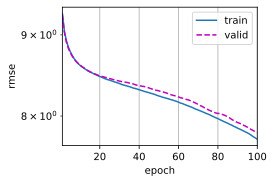

In [30]:
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 5, 0, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')

In [35]:
def train_and_pred(train_features,test_features,train_labels,test_labels,num_epochs,lr,weight_decay,batch_size):
    net=get_net()
    net.to(device)
    train_ls,_=train(net,train_features,train_labels,None,None,num_epochs,lr,weight_decay,batch_size)
    d2l.plot(np.arange(1,num_epochs+1),[train_ls],xlabel='epoch',ylabel='log rmse',xlim=[1,num_epochs],yscale='log')
    print(f"训练log rmse：{float(train_ls[-1]):f}")
    preds=net(test_features).cpu().detach().numpy()
    test_data['SalePrice']=pd.Series(preds.reshape(1,-1)[0])
    submission=pd.concat([test_data['Id'],test_data['SalePrice']],axis=1)
    submission.to_csv('submission.csv',index=False)

训练log rmse：7.329792


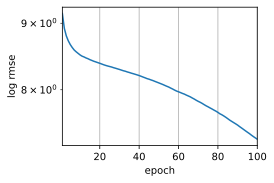

In [36]:
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)